In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df=pd.read_csv("Q1.csv",header=None)
df.columns=["y",'x1','x2']
X=df.drop("y",axis=1).values.astype(float)
Y=df['y'].values.astype(float)
Y=np.expand_dims(Y,axis=1)
print(Y.shape)


(100, 1)


In [13]:
def train_test_split(X,Y,split):
    # split belongs [0,1]
    split_num=int(Y.shape[0]*split)
    Y_1=Y[:split_num,:]
    Y_2=Y[split_num:,:]
    X_1=X[:split_num,:]
    X_2=X[split_num:,:]
    return X_1,X_2,Y_1,Y_2

xt,xv,yt,yv=train_test_split(X,Y,0.8)
print(xt.shape,yt.shape,xv.shape)

(80, 2) (80, 1) (20, 2)


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC(kernel="linear")
yt=yt.ravel()
model.fit(xt,yt)
pred=model.predict(xv)
print(accuracy_score(yv,pred))

1.0


In [34]:
w=model.coef_
b=model.intercept_
print(w)
print(b)

[[-1.71790295  1.15354909]]
[1.96911106]


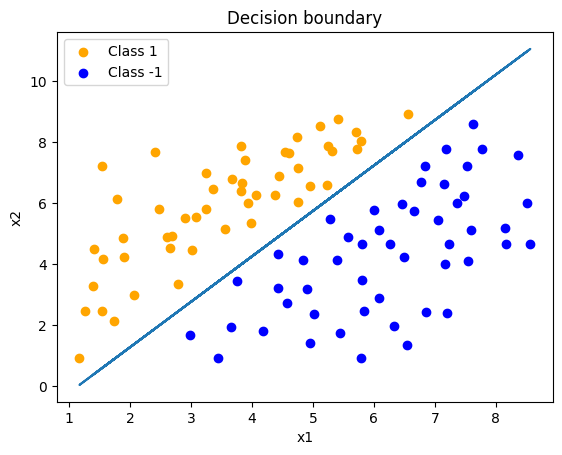

In [35]:
plt.scatter(df[df["y"] == 1]["x1"],
            df[df["y"] == 1]["x2"],
            c="orange",
            label="Class 1") 
plt.scatter(df[df["y"] == -1]["x1"],
            df[df["y"] == -1]["x2"],
            c="blue",
            label="Class -1")
plt.plot(df["x1"],-(b[0]+df["x1"]*w[0][0])/w[0][1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision boundary")
plt.legend()
plt.show()